In [281]:
import pandas as pd
import seaborn as sb

In [282]:
ACC = pd.read_csv("ACC1.csv")

In [283]:
ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})

In [284]:
GYR = pd.read_csv("GYR1.csv")

In [285]:
GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})

In [286]:
temptime = []
for i in range(len(ACC)):
    temptime.append(int(ACC["time"][i]/100))

In [287]:
ACC['UpdatedTime'] = temptime

In [288]:
ACC = ACC.drop(columns=["time"])

In [289]:
temptime = []
for i in range(len(GYR)):
    temptime.append(int(GYR["time"][i]/100))

In [290]:
GYR['UpdatedTime'] = temptime

In [291]:
GYR = GYR.drop(columns=["time"])

In [292]:
Maindf1 = pd.merge(ACC, GYR, on='UpdatedTime')

In [293]:
Maindf1

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,-0.357117,-0.444672,-0.979065,16698156347,0.733399,-2.074193,0.931552
1,-0.357117,-0.444672,-0.979065,16698156347,-2.061976,0.190624,0.217336
2,-0.241684,-0.488953,-0.753235,16698156348,-2.294853,0.053221,1.194206
3,-0.241684,-0.488953,-0.753235,16698156348,0.789920,0.178700,1.223067
4,-0.020355,-0.299332,-1.150085,16698156349,1.060830,-1.833248,0.053712
...,...,...,...,...,...,...,...
1295,0.285187,-0.585083,-0.817520,16698156992,0.264968,-0.404431,-0.182917
1296,0.284851,-0.588150,-0.699860,16698156993,0.856458,0.241607,-0.190887
1297,0.284851,-0.588150,-0.699860,16698156993,1.082461,0.630812,-0.261755
1298,0.438171,-0.654587,-0.729492,16698156994,1.130285,1.009613,-0.285881


In [294]:
for i in range(len(Maindf)-1):
    if((Maindf1.accx[i] == Maindf1.accx[i+1]) and (Maindf1.accy[i] == Maindf1.accy[i+1])):
        Maindf1 = Maindf1.drop(labels=[i])

In [295]:
Maindf1

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
1,-0.357117,-0.444672,-0.979065,16698156347,-2.061976,0.190624,0.217336
3,-0.241684,-0.488953,-0.753235,16698156348,0.789920,0.178700,1.223067
5,-0.020355,-0.299332,-1.150085,16698156349,0.129470,-0.348358,0.357377
7,-0.233139,-0.391693,-0.825714,16698156350,0.737399,-0.685036,1.108198
9,-0.313568,-0.413544,-0.727982,16698156351,0.445771,-2.178672,1.921903
...,...,...,...,...,...,...,...
1295,0.285187,-0.585083,-0.817520,16698156992,0.264968,-0.404431,-0.182917
1296,0.284851,-0.588150,-0.699860,16698156993,0.856458,0.241607,-0.190887
1297,0.284851,-0.588150,-0.699860,16698156993,1.082461,0.630812,-0.261755
1298,0.438171,-0.654587,-0.729492,16698156994,1.130285,1.009613,-0.285881


In [296]:
Maindf1.index = range(0,len(Maindf1),1)

In [297]:
Maindf1.UpdatedTime.value_counts()

16698156910    4
16698156984    3
16698156930    3
16698156793    3
16698156727    3
              ..
16698156564    1
16698156565    1
16698156566    1
16698156567    1
16698156347    1
Name: UpdatedTime, Length: 641, dtype: int64

In [298]:
def upstairs_data_odd(acc,gyr):
    ACC = pd.read_csv(acc)
    GYR = pd.read_csv(gyr)
    ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})
    GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})
    temptime = []
    for i in range(len(ACC)):
        temptime.append(int(ACC["time"][i]/100))
    ACC['UpdatedTime'] = temptime
    ACC = ACC.drop(columns=["time"])
    temptime = []
    for i in range(len(GYR)):
        temptime.append(int(GYR["time"][i]/100))
    GYR['UpdatedTime'] = temptime
    GYR = GYR.drop(columns=["time"])
    Maindf1 = pd.merge(ACC, GYR, on='UpdatedTime')
    for i in range(len(Maindf1)-1):
        if((Maindf1.accx[i] == Maindf1.accx[i+1]) or (Maindf1.gyrx[i] == Maindf1.gyrx[i+1])):
            Maindf1 = Maindf1.drop(labels=[i])
    Maindf1.index = range(0,len(Maindf1),1)
    return Maindf1

In [299]:
df1 = upstairs_data_odd("ACC1.csv","GYR1.csv")

In [300]:
df1

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,-0.357117,-0.444672,-0.979065,16698156347,-2.061976,0.190624,0.217336
1,-0.241684,-0.488953,-0.753235,16698156348,0.789920,0.178700,1.223067
2,-0.020355,-0.299332,-1.150085,16698156349,0.129470,-0.348358,0.357377
3,-0.233139,-0.391693,-0.825714,16698156350,0.737399,-0.685036,1.108198
4,-0.313568,-0.413544,-0.727982,16698156351,0.445771,-2.178672,1.921903
...,...,...,...,...,...,...,...
640,0.385376,-0.618103,-0.690735,16698156990,0.066745,-0.817249,-0.078493
641,0.318268,-0.596329,-0.781982,16698156991,0.082061,-0.524930,-0.100586
642,0.285187,-0.585083,-0.817520,16698156992,0.264968,-0.404431,-0.182917
643,0.284851,-0.588150,-0.699860,16698156993,1.082461,0.630812,-0.261755


In [301]:
df5 = upstairs_data_odd("ACC5.csv","GYR5.csv")

In [302]:
df5

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,0.198929,-0.566650,-0.830673,16698165816,0.090054,0.081739,0.125579
1,0.184158,-0.564697,-0.751572,16698165817,0.070763,0.018164,-0.002615
2,0.217331,-0.531326,-0.715286,16698165818,-0.183950,0.084084,-0.081429
3,0.271332,-0.540192,-0.629333,16698165819,0.168108,-0.188175,-0.106129
4,0.126846,-0.426514,-0.759354,16698165820,-0.686583,-0.786927,-1.087099
...,...,...,...,...,...,...,...
791,0.010056,-0.439835,-0.924927,16698166611,-1.194536,0.990526,-2.026957
792,0.117371,-0.333908,-0.831268,16698166612,0.003890,-1.040169,-2.846200
793,0.283676,-0.577072,-1.034729,16698166613,1.659774,0.305626,-1.045814
794,0.198776,-0.397522,-0.948456,16698166614,0.038459,-0.556863,-1.297178


In [303]:
df7 = upstairs_data_odd("ACC7.csv","GYR7.csv")

In [304]:
df7

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,-0.034988,-0.298218,-0.965942,16698168249,0.245403,0.131001,-0.214684
1,0.001907,-0.392624,-0.851791,16698168250,0.091405,-0.070920,-0.014257
2,0.017181,-0.380585,-0.991699,16698168251,-0.000686,-0.060152,0.034699
3,-0.027985,-0.339371,-0.920990,16698168252,-0.012080,-0.052231,0.021451
4,-0.050888,-0.324814,-0.917236,16698168253,0.818861,0.390006,0.880761
...,...,...,...,...,...,...,...
768,0.159164,-0.467224,-0.823669,16698169022,1.022010,-1.390235,0.513155
769,-0.105103,-0.483765,-0.980774,16698169023,1.084069,-0.695139,-0.120333
770,-0.063339,-0.513245,-0.818375,16698169024,0.811693,-0.741218,-0.017446
771,-0.319580,-0.546616,-0.704849,16698169025,-0.132547,-0.270226,-0.614510


In [305]:
df9 = upstairs_data_odd("ACC9.csv","GYR9.csv")

In [306]:
df9

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,0.075378,-0.315125,-0.960144,16698173828,0.351471,-0.240385,0.290702
1,-0.059692,-0.337692,-0.891464,16698173829,0.379121,0.708247,0.027374
2,-0.032822,-0.332565,-0.866928,16698173830,0.337329,-0.671602,-0.496953
3,-0.267288,-0.268890,-0.783234,16698173831,1.268461,-2.787960,0.559989
4,-0.468842,-0.071045,-0.060852,16698173832,0.612468,-5.678932,1.007339
...,...,...,...,...,...,...,...
763,0.385544,-0.263687,-0.799088,16698174596,1.309973,-0.061790,-1.148758
764,0.580246,-0.601105,-0.730377,16698174596,1.309973,-0.061790,-1.148758
765,0.434250,-0.562485,-0.571976,16698174597,1.047882,-0.688660,-0.896218
766,0.553421,-0.601273,-0.695404,16698174598,0.526130,-0.319936,-0.699077


In [307]:
df11 = upstairs_data_odd("ACC11.csv","GYR11.csv")

In [308]:
df11

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,0.016220,-0.525040,-0.849060,16698176377,-0.120103,-1.068971,-0.495756
1,0.072617,-0.726196,-0.841263,16698176378,-0.101309,0.949116,0.411446
2,-0.101562,-0.635559,-0.899780,16698176379,1.455473,-1.807090,-0.272750
3,0.168564,-0.701859,-0.726822,16698176380,-0.211295,-0.313840,-0.479493
4,-0.068512,-0.418839,-0.853439,16698176381,-0.956577,0.666828,1.545376
...,...,...,...,...,...,...,...
736,-0.084152,-0.174698,-0.937408,16698177117,0.628238,-0.571502,-1.579526
737,-0.013947,-0.340744,-0.891464,16698177118,1.568853,-1.278127,-1.812280
738,0.067200,-0.764008,-0.873230,16698177119,-0.570229,1.964353,-1.611217
739,0.291550,-0.444489,-0.786026,16698177120,0.619886,2.138275,-0.720209


In [309]:
df15 = upstairs_data_odd("ACC15.csv","GYR15.csv")

In [310]:
df15

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,0.028656,-0.586380,-0.931625,16698181088,-0.405622,-0.161423,-0.411968
1,0.104874,-0.746246,-0.949936,16698181089,1.279805,-0.624838,0.081702
2,-0.052551,-0.625854,-0.835556,16698181090,-3.037917,0.997126,0.584033
3,0.021103,-0.457016,-0.892731,16698181091,-0.398650,-0.798775,0.934894
4,-0.159973,-0.260742,-0.766006,16698181092,1.528038,-2.319915,-0.547832
...,...,...,...,...,...,...,...
737,0.141342,-0.235367,-0.683472,16698181829,1.237922,0.104805,-0.940597
738,0.407578,-0.587097,-0.789444,16698181830,0.962492,0.549547,-1.046115
739,0.703018,-0.580902,-0.647812,16698181831,0.200285,0.140492,-1.159012
740,0.521194,-0.592163,-0.772537,16698181832,0.944223,-1.169329,-1.189023


In [311]:
df17 = upstairs_data_odd("ACC17.csv","GYR17.csv")

In [312]:
df17

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,-0.113190,-0.184143,-0.911438,16698183432,-0.205071,0.092541,-0.180190
1,-0.130402,-0.154861,-0.950043,16698183433,-0.292675,-0.501071,-0.267344
2,-0.225891,-0.206375,-1.119690,16698183434,-0.476165,0.586825,-0.059517
3,-0.031250,0.167496,-1.089264,16698183435,-0.495557,0.490030,-0.288115
4,-0.039200,-0.256378,-1.080505,16698183436,4.054873,-1.820843,-2.106791
...,...,...,...,...,...,...,...
731,0.193130,-0.362274,-0.796967,16698184161,0.340595,-1.401597,-1.630792
732,0.388336,-0.343643,-0.897614,16698184163,0.381719,1.623074,-0.465866
733,0.286697,-0.420517,-0.913452,16698184164,1.087286,0.151319,0.471724
734,0.353668,-0.457077,-0.789001,16698184164,1.087286,0.151319,0.471724


In [313]:
df13 = upstairs_data_odd("ACC13.csv","GYR13.csv")

In [314]:
df13

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,0.092865,-0.233231,-0.970459,16698178734,0.891212,-2.238075,-0.134615
1,-0.185318,-0.269653,-1.014786,16698178735,-0.169593,-0.107442,0.145626
2,-0.014572,-0.302048,-0.850540,16698178736,0.203548,0.699615,0.567088
3,-0.006104,-0.210297,-0.777481,16698178737,-0.161380,-0.708413,0.535600
4,-0.213211,-0.175949,-0.600250,16698178738,-0.278405,-2.224403,-0.301241
...,...,...,...,...,...,...,...
768,-0.055450,-0.421448,-1.215881,16698179506,1.404811,-0.143085,-0.126529
769,0.126526,-0.404922,-0.839691,16698179507,0.421350,1.638622,-0.123235
770,0.150177,-0.280273,-0.951431,16698179508,0.582663,0.355172,-0.676027
771,0.239319,-0.343781,-0.781235,16698179509,0.907292,1.460290,-0.341712


In [331]:
ACC = pd.read_csv("ACC2.csv")

In [332]:
ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})

In [333]:
GYR = pd.read_csv("GYR2.csv")

In [334]:
GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})

In [335]:
temptime = []
for i in range(len(ACC)):
    temptime.append(int(ACC["time"][i]/100))

In [336]:
ACC['UpdatedTime'] = temptime

In [337]:
ACC = ACC.drop(columns=["time"])

In [338]:
temptime = []
for i in range(len(GYR)):
    temptime.append(int(GYR["time"][i]/100))

In [339]:
GYR['UpdatedTime'] = temptime

In [340]:
GYR = GYR.drop(columns=["time"])

In [351]:
Maindf = pd.merge(ACC, GYR, on='UpdatedTime')

In [352]:
Maindf

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,1.369994,-0.032014,-0.148476,16698156344,-0.194562,-1.060262,1.041150
1,1.369994,-0.032014,-0.148476,16698156344,0.318862,-0.967587,1.255237
2,1.013496,0.159580,-0.043241,16698156344,-0.194562,-1.060262,1.041150
3,1.013496,0.159580,-0.043241,16698156344,0.318862,-0.967587,1.255237
4,0.607241,0.011824,0.312140,16698156344,-0.194562,-1.060262,1.041150
...,...,...,...,...,...,...,...
2760,0.887046,0.295315,-0.267568,16698157086,-0.278713,0.222337,-0.005912
2761,0.887046,0.295315,-0.267568,16698157086,-0.305387,0.077550,-0.012375
2762,0.542081,0.356804,-0.370157,16698157086,-0.278713,0.222337,-0.005912
2763,0.542081,0.356804,-0.370157,16698157086,-0.305387,0.077550,-0.012375


In [356]:
for i in range(len(Maindf)-1):
    if(Maindf.UpdatedTime[i] == Maindf.UpdatedTime[i+1]):
        if((Maindf.accx[i] == Maindf.accx[i+1]) or (Maindf.gyrx[i] == Maindf.gyrx[i+1])):
            Maindf = Maindf.drop(labels=[i])

In [357]:
Maindf

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
1,1.369994,-0.032014,-0.148476,16698156344,0.318862,-0.967587,1.255237
3,1.013496,0.159580,-0.043241,16698156344,0.318862,-0.967587,1.255237
5,0.607241,0.011824,0.312140,16698156344,0.318862,-0.967587,1.255237
7,0.999118,0.072609,0.066995,16698156345,-0.277613,-0.527587,0.100512
9,0.903673,-0.132048,0.200787,16698156345,-0.277613,-0.527587,0.100512
...,...,...,...,...,...,...,...
2757,0.797719,0.365155,-0.161630,16698157085,-0.229762,0.256438,-0.141212
2759,0.846268,0.284501,-0.174371,16698157085,-0.229762,0.256438,-0.141212
2761,0.887046,0.295315,-0.267568,16698157086,-0.305387,0.077550,-0.012375
2763,0.542081,0.356804,-0.370157,16698157086,-0.305387,0.077550,-0.012375


In [358]:
Maindf.index = range(0,len(Maindf),1)

In [359]:
Maindf

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,1.369994,-0.032014,-0.148476,16698156344,0.318862,-0.967587,1.255237
1,1.013496,0.159580,-0.043241,16698156344,0.318862,-0.967587,1.255237
2,0.607241,0.011824,0.312140,16698156344,0.318862,-0.967587,1.255237
3,0.999118,0.072609,0.066995,16698156345,-0.277613,-0.527587,0.100512
4,0.903673,-0.132048,0.200787,16698156345,-0.277613,-0.527587,0.100512
...,...,...,...,...,...,...,...
1360,0.797719,0.365155,-0.161630,16698157085,-0.229762,0.256438,-0.141212
1361,0.846268,0.284501,-0.174371,16698157085,-0.229762,0.256438,-0.141212
1362,0.887046,0.295315,-0.267568,16698157086,-0.305387,0.077550,-0.012375
1363,0.542081,0.356804,-0.370157,16698157086,-0.305387,0.077550,-0.012375


In [360]:
for i in range(len(Maindf)-1):
    if(Maindf.UpdatedTime[i] == Maindf.UpdatedTime[i+1]):
        if((Maindf.accx[i] == Maindf.accx[i+1]) or (Maindf.gyrx[i] == Maindf.gyrx[i+1])):
            Maindf = Maindf.drop(labels=[i])

In [362]:
def 

-1.575263    3
-0.700438    3
-0.926310    3
-1.143617    3
-0.831064    2
            ..
-1.440446    1
-1.274441    1
-0.696262    1
-0.641091    1
-0.314282    1
Name: accx, Length: 701, dtype: int64

In [366]:
def upstairs_data_even(acc,gyr):
    ACC = pd.read_csv(acc)
    ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})
    GYR = pd.read_csv(gyr)
    GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})
    temptime = []
    for i in range(len(ACC)):
        temptime.append(int(ACC["time"][i]/100))
    ACC['UpdatedTime'] = temptime
    ACC = ACC.drop(columns=["time"])
    temptime = []
    for i in range(len(GYR)):
        temptime.append(int(GYR["time"][i]/100))
    GYR['UpdatedTime'] = temptime
    GYR = GYR.drop(columns=["time"])
    Maindf = pd.merge(ACC, GYR, on='UpdatedTime')
    for i in range(len(Maindf)-1):
        if(Maindf.UpdatedTime[i] == Maindf.UpdatedTime[i+1]):
            if((Maindf.accx[i] == Maindf.accx[i+1]) or (Maindf.gyrx[i] == Maindf.gyrx[i+1])):
                Maindf = Maindf.drop(labels=[i])
    Maindf.index = range(0,len(Maindf),1)
    for i in range(len(Maindf)-1):
        if(Maindf.UpdatedTime[i] == Maindf.UpdatedTime[i+1]):
            if((Maindf.accx[i] == Maindf.accx[i+1]) or (Maindf.gyrx[i] == Maindf.gyrx[i+1])):
                Maindf = Maindf.drop(labels=[i])
    Maindf.index = range(0,len(Maindf),1)
    return Maindf

In [368]:
df2 = upstairs_data_even("ACC2.csv","GYR2.csv")

In [369]:
df4 = upstairs_data_even("ACC4.csv","GYR4.csv")

In [370]:
df6 = upstairs_data_even("ACC6.csv","GYR6.csv")

In [372]:
df8 = upstairs_data_even("ACC8.csv","GYR8.csv")

In [374]:
df10 = upstairs_data_even("ACC10.csv","GYR10.csv")

In [376]:
df12 = upstairs_data_even("ACC12.csv","GYR12.csv")

In [378]:
df14 = upstairs_data_even("ACC14.csv","GYR14.csv")

In [380]:
df16 = upstairs_data_even("ACC16.csv","GYR16.csv")

In [382]:
df18 = upstairs_data_even("ACC18.csv","GYR18.csv")

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,1.041334,0.174479,0.167641,16698183437,-1.653988,-0.689562,1.111550
1,0.659751,0.228411,0.181300,16698183438,-1.808400,0.098862,0.205013
2,1.009106,0.089740,0.129509,16698183439,-2.299550,0.063662,-0.174350
3,0.832593,0.246460,-0.017636,16698183440,-1.759450,-0.014162,0.006875
4,0.953430,0.168559,-0.093809,16698183441,-1.800975,0.364100,-1.100000
...,...,...,...,...,...,...,...
742,0.994025,0.190784,-0.076479,16698184185,0.200613,0.486612,0.502150
743,0.959349,0.180077,-0.007342,16698184186,0.139975,0.080712,0.023788
744,0.932016,0.124400,0.003564,16698184187,0.432850,0.734800,-0.029425
745,0.465709,0.206385,-0.066384,16698184188,0.513838,0.843425,0.000412


In [386]:
UPSTAIRS = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18])

In [387]:
UPSTAIRS

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz
0,-0.357117,-0.444672,-0.979065,16698156347,-2.061976,0.190624,0.217336
1,-0.241684,-0.488953,-0.753235,16698156348,0.789920,0.178700,1.223067
2,-0.020355,-0.299332,-1.150085,16698156349,0.129470,-0.348358,0.357377
3,-0.233139,-0.391693,-0.825714,16698156350,0.737399,-0.685036,1.108198
4,-0.313568,-0.413544,-0.727982,16698156351,0.445771,-2.178672,1.921903
...,...,...,...,...,...,...,...
742,-0.076479,0.190784,0.994025,16698184185,0.502150,0.486612,0.200613
743,-0.007342,0.180077,0.959349,16698184186,0.023788,0.080712,0.139975
744,0.003564,0.124400,0.932016,16698184187,-0.029425,0.734800,0.432850
745,-0.066384,0.206385,0.465709,16698184188,0.000412,0.843425,0.513838


In [388]:
UPSTAIRS.index = range(0,len(UPSTAIRS),1)

In [389]:
plotupstairsdf =  UPSTAIRS.iloc[0:500,:]

<AxesSubplot:xlabel='UpdatedTime', ylabel='accx'>

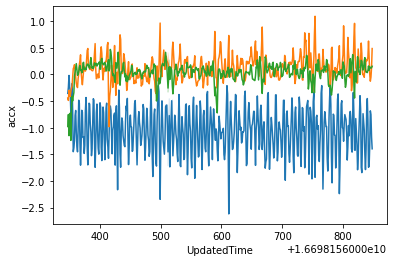

In [390]:
sb.lineplot(y = 'accx', x = 'UpdatedTime', data = plotupstairsdf)
sb.lineplot(y = 'accy', x = 'UpdatedTime', data = plotupstairsdf)
sb.lineplot(y = 'accz', x = 'UpdatedTime', data = plotupstairsdf)

<AxesSubplot:xlabel='UpdatedTime', ylabel='gyrx'>

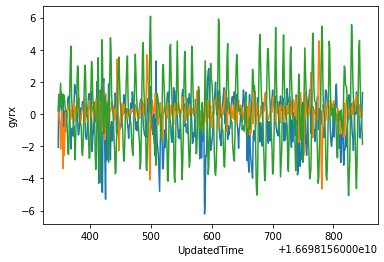

In [391]:
sb.lineplot(y = 'gyrx', x = 'UpdatedTime', data = plotupstairsdf)
sb.lineplot(y = 'gyry', x = 'UpdatedTime', data = plotupstairsdf)
sb.lineplot(y = 'gyrz', x = 'UpdatedTime', data = plotupstairsdf)

In [392]:
Label = []
for i in range(len(WALKDF)):
    Label.append("upstairs")

In [393]:
UPSTAIRS["Label"] = Label

In [394]:
UPSTAIRS.to_csv("UPSTAIRS.csv",index=False)

In [395]:
df2

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,0.607241,0.011824,0.312140,16698156344,0.318862,-0.967587,1.255237
1,0.903673,-0.132048,0.200787,16698156345,-0.277613,-0.527587,0.100512
2,0.866764,0.148369,0.122672,16698156346,-1.591150,-0.788562,0.593725
3,1.182774,0.330495,-0.012741,16698156347,-0.456638,-0.373175,-0.411812
4,1.192043,0.198340,-0.026615,16698156348,-0.409750,-0.070538,-0.036850
...,...,...,...,...,...,...,...
731,0.924368,0.473969,-0.109105,16698157083,-0.402325,0.589875,0.147400
732,0.872668,0.364345,-0.177018,16698157084,-0.367125,0.618612,0.285863
733,0.846268,0.284501,-0.174371,16698157085,-0.229762,0.256438,-0.141212
734,0.542081,0.356804,-0.370157,16698157086,-0.305387,0.077550,-0.012375
